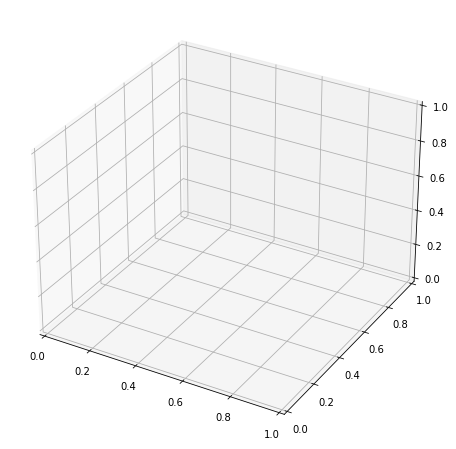

In [ ]:
import tkinter as tk
from tkinter import *
from tkinter import filedialog
from tkinter.ttk import *
import tkinter.font as TkFont
from tkinter.colorchooser import askcolor
from tkinter.filedialog import asksaveasfile
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from mpl_toolkits.mplot3d import Axes3D
import math
from math import cos, sin, atan,pi
import numpy as np
from numpy import sin, cos, sqrt
from dms2dec.dms_convert import dms2dec
from PIL import ImageTk, Image

prozor = tk.Tk()
font = TkFont.Font(family='Times New Roman',size=12 ,weight="bold")
prozor.title("Projekat")
prozor.geometry("1300x580+100+100")
color = '#badcf7'
prozor.configure(bg=color)

listaLabela = ['', '', '', ''] 
listaLinija = ['', '', '', ''] 
listaTacaka = ['', '', '', ''] 
listaElipsoida = ['Other..'] 
listaObjekataElipsoida = []

#funkcija za dugme update
def update():
    try:
        listaStepeni = [l1_deg.get(),l2_deg.get(),f1_deg.get(),f2_deg.get()]
        listaMinut = [l1_min.get(),l2_min.get(),f1_min.get(),f2_min.get()]
        listaSekund = [l1_sec.get(),l2_sec.get(), f1_sec.get(), f2_sec.get()]
        int(listaStepeni[0])
        int(listaStepeni[1])
        int(listaStepeni[2])
        int(listaStepeni[3])
        int(listaMinut[0])
        int(listaMinut[1])
        int(listaMinut[2])
        int(listaMinut[3])
        float(listaSekund[0])
        float(listaSekund[1])
        float(listaSekund[2])
        float(listaSekund[3])
        if((int(l1_deg.get())==180 and (int(l1_min.get())!=0 or int(l1_sec.get())!=0)) or
               (int(l2_deg.get())==180 and (int(l2_min.get())!=0 or int(l2_sec.get())!=0)) or
                   (int(f1_deg.get())==90 and (int(f1_min.get())!=0 or int(f1_sec.get())!=0)) or
                       (int(f2_deg.get())==90 and (int(f2_min.get())!=0 or int(f2_sec.get())!=0))):
                    tk.messagebox.showerror(title='Error', message='Meridijani mogu da imaju vrednosti od 0 do 180 stepeni zapadne/istocne geografske duzine, a paralele od 0 do 90 stepeni severne/juzne geografske sirine. Ponovite unos.', parent=prozor)
        elif((int(l1_deg.get())<0 or int(l1_deg.get())>180) or (int(l2_deg.get())<0 or int(l2_deg.get())>180) or 
               (int(f1_deg.get())<0 or int(f1_deg.get())>90) or (int(f2_deg.get())<0 or int(f2_deg.get())>90)):
            tk.messagebox.showerror(title='Error', message='Meridijani mogu da imaju vrednosti od 0 do 180 stepeni zapadne/istocne geografske duzine, a paralele od 0 do 90 stepeni severne/juzne geografske sirine. Ponovite unos.', parent=prozor)
        elif ((int(l1_min.get())<0 or int(l1_min.get())>=60) or(int(l2_min.get())<0 or int(l2_min.get())>=60) or 
                  (int(f1_min.get())<0 or int(f1_min.get())>=60) or (int(f2_min.get())<0 or int(f2_min.get())>=60)):
            tk.messagebox.showerror(title='Error', message='Minuti primaju vrednosti od 0 do 59')
        elif ((int(l1_sec.get())<0 or float(l1_sec.get())>=60) or (int(l2_sec.get())<0 or float(l2_sec.get())>=60) or 
                  (int(f1_sec.get())<0 or float(f1_sec.get())>=60) or (int(f2_sec.get())<0 or float(f2_sec.get())>=60)):
            tk.messagebox.showerror(title='Error', message='Unesite vrednost sekundi u decimalnom zapisu u rangu od 0 do 59')
        elif (entry1.get() != 'E' and entry1.get() != 'W' and entry1.get() != 'w' and entry1.get() != 'e'):
            tk.messagebox.showerror(title='Error', message='Vrednosti geografske duzine mogu da budu West(W)/East(E)')
        elif (entry2.get() != 'E' and entry2.get() != 'W' and entry2.get() != 'w' and entry2.get() != 'e'):
            tk.messagebox.showerror(title='Error', message='Vrednosti geografske duzine mogu da budu West(W)/East(E)')
        elif (entry3.get() != 'S' and entry3.get() != 'N' and entry3.get() != 's' and entry3.get() != 'n'):
            tk.messagebox.showerror(title='Error', message='Vrednosti geografske sirine mogu da budu North(N)/South(S)')
        elif (entry4.get() != 'S' and entry4.get() != 'N' and entry4.get() != 's' and entry4.get() != 'n'):
            tk.messagebox.showerror(title='Error', message='Vrednosti geografske sirine mogu da budu North(N)/South(S)')
        else:
            ax.clear() 
            global listaLinija 
            komboLejeri1['values']=('λ1', 'λ2', 'φ1', 'φ2')
            komboLejeri2['values']=('T1', 'T2', 'T3', 'T4')
            listaLinija[0] = Layer(l1_deg.get(), l1_min.get(), l1_sec.get(), entry1.get(), 1, listaLinija[0].debljina, listaLinija[0].stil, listaLinija[0].boja)
            listaLinija[1] = Layer(l2_deg.get(), l2_min.get(), l2_sec.get(), entry2.get(), 2, listaLinija[1].debljina, listaLinija[1].stil, listaLinija[1].boja)
            listaLinija[2] = Layer(f1_deg.get(), f1_min.get(), f1_sec.get(), entry3.get(), 3, listaLinija[2].debljina, listaLinija[2].stil, listaLinija[2].boja)
            listaLinija[3] = Layer(f2_deg.get(), f2_min.get(), f2_sec.get(), entry4.get(), 4, listaLinija[3].debljina, listaLinija[3].stil, listaLinija[3].boja)
            name = kombo.get() #ime eliposida
            index = listaElipsoida.index(name) 
            a = listaObjekataElipsoida[index].a
            b = listaObjekataElipsoida[index].b
            f = listaObjekataElipsoida[index].f
            e2 = listaObjekataElipsoida[index].e2
            eprim2 = listaObjekataElipsoida[index].ep2

            l1 = (str(listaLinija[0].deg)+"°"+str(listaLinija[0].mnt)+"\'"+str(listaLinija[0].sec)+"\""+str(listaLinija[0].orient))
            l1_dec = dms2dec(l1)
            l1_rad = math.radians(l1_dec)
            l2 = (str(listaLinija[1].deg)+"°"+str(listaLinija[1].mnt)+"\'"+str(listaLinija[1].sec)+"\""+str(listaLinija[1].orient))
            l2_dec = dms2dec(l2)
            l2_rad = math.radians(l2_dec)
            f1 = (str(listaLinija[2].deg)+"°"+str(listaLinija[2].mnt)+"\'"+str(listaLinija[2].sec)+"\""+str(listaLinija[2].orient))
            f1_dec = dms2dec(f1)
            f1_rad = math.radians(f1_dec)
            f2 = (str(listaLinija[3].deg)+"°"+str(listaLinija[3].mnt)+"\'"+str(listaLinija[3].sec)+"\""+str(listaLinija[3].orient))
            f2_dec = dms2dec(f2)
            f2_rad = math.radians(f2_dec)
            
            X1 = (a/math.sqrt(1-e2*(pow(math.sin(f1_rad),2))))*math.cos(f1_rad)*math.cos(l1_rad)
            Y1 = (a/math.sqrt(1-e2*(pow(math.sin(f1_rad),2))))*math.cos(f1_rad)*math.sin(l1_rad)
            Z1 = a*(1-e2)/(math.sqrt(1-e2*pow(math.sin(f1_rad),2)))*math.sin(f1_rad)
            
            X2 = (a/math.sqrt(1-e2*(pow(math.sin(f1_rad),2))))*math.cos(f1_rad)*math.cos(l2_rad)
            Y2 = (a/math.sqrt(1-e2*(pow(math.sin(f1_rad),2))))*math.cos(f1_rad)*math.sin(l2_rad)
            Z2 = a*(1-e2)/(math.sqrt(1-e2*pow(math.sin(f1_rad),2)))*math.sin(f1_rad)
            
            X3 = (a/math.sqrt(1-e2*(pow(math.sin(f2_rad),2))))*math.cos(f2_rad)*math.cos(l1_rad)
            Y3 = (a/math.sqrt(1-e2*(pow(math.sin(f2_rad),2))))*math.cos(f2_rad)*math.sin(l1_rad)
            Z3 = a*(1-e2)/(math.sqrt(1-e2*pow(math.sin(f2_rad),2)))*math.sin(f2_rad)
            
            X4 = (a/math.sqrt(1-e2*(pow(math.sin(f2_rad),2))))*math.cos(f2_rad)*math.cos(l2_rad)
            Y4 = (a/math.sqrt(1-e2*(pow(math.sin(f2_rad),2))))*math.cos(f2_rad)*math.sin(l2_rad)
            Z4 = a*(1-e2)/(math.sqrt(1-e2*pow(math.sin(f2_rad),2)))*math.sin(f2_rad)
            
            listaTacaka[0] = Tacka(X1, Y1, Z1, 1, listaTacaka[0].debljina, listaTacaka[0].boja)
            listaTacaka[1] = Tacka(X2, Y2, Z2, 2, listaTacaka[1].debljina, listaTacaka[1].boja)
            listaTacaka[2] = Tacka(X3, Y3, Z3, 3, listaTacaka[2].debljina, listaTacaka[2].boja)
            listaTacaka[3] = Tacka(X4, Y4, Z4, 4, listaTacaka[3].debljina, listaTacaka[3].boja)
            ax.scatter3D(listaTacaka[0].x, listaTacaka[0].y, listaTacaka[0].z, s = listaTacaka[0].debljina, color = listaTacaka[0].boja)
            ax.scatter3D(listaTacaka[1].x, listaTacaka[1].y, listaTacaka[1].z, s = listaTacaka[1].debljina, color = listaTacaka[1].boja)
            ax.scatter3D(listaTacaka[2].x, listaTacaka[2].y, listaTacaka[2].z, s = listaTacaka[2].debljina, color = listaTacaka[2].boja)
            ax.scatter3D(listaTacaka[3].x, listaTacaka[3].y, listaTacaka[3].z, s = listaTacaka[3].debljina, color = listaTacaka[3].boja)
            global listaLabela
            listaLabela[0] = ax.text(listaTacaka[0].x+200000, listaTacaka[0].y+200000, listaTacaka[0].z+200000, '%s' % ('T1'), size=14, color='k')
            listaLabela[1] = ax.text(listaTacaka[1].x+200000, listaTacaka[1].y+200000, listaTacaka[1].z+200000, '%s' % ('T2'), size=14, color='k') 
            listaLabela[2] = ax.text(listaTacaka[2].x+200000, listaTacaka[2].y+200000, listaTacaka[2].z+200000, '%s' % ('T3'), size=14, color='k') 
            listaLabela[3] = ax.text(listaTacaka[3].x+200000, listaTacaka[3].y+200000, listaTacaka[3].z+200000, '%s' % ('T4'), size=14, color='k') 
            
            #pravljenje elipsoida
            coefs = (a, a, b)
            rx, ry, rz = coefs
            u = np.linspace(0, 2 * np.pi, 50)
            v = np.linspace(0, np.pi, 50)
            x = rx * np.outer(np.cos(u), np.sin(v))
            y = ry * np.outer(np.sin(u), np.sin(v))
            z = rz * np.outer(np.ones_like(u), np.cos(v))
            # Plot:
            ax.plot_wireframe(x, y, z,  rstride=4, cstride=4, color='red', linewidth=0.5)
    
            #prva paralela
            u = np.linspace(0, 2 * np.pi, 100)
            v = np.linspace(f1_rad, f1_rad, 100) #jer nam na tom mestu treba samo jedan ugao
            x = (a/np.sqrt(1-e2*(pow(np.sin(v),2))))*np.outer(np.cos(v), np.cos(u)) 
            y = (a/np.sqrt(1-e2*(pow(np.sin(v),2))))*np.outer(np.cos(v), np.sin(u)) 
            z = a*(1-e2)/(np.sqrt(1-e2*pow(np.sin(v),2)))*np.outer(np.sin(v), np.ones_like(u))
            # Plot:
            ax.plot_wireframe(x, y, z, linestyle=listaLinija[2].stil, color=listaLinija[2].boja, linewidth=listaLinija[2].debljina, rstride=4, cstride=4)
            #kad se napravi ta linija preuzimaju se njeni stilovi
            
            #druga paralela
            u = np.linspace(0, 2 * np.pi, 100)
            v = np.linspace(f2_rad, f2_rad, 100)
            x = (a/np.sqrt(1-e2*(pow(np.sin(v),2))))*np.outer(np.cos(v), np.cos(u)) 
            y = (a/np.sqrt(1-e2*(pow(np.sin(v),2))))*np.outer(np.cos(v), np.sin(u)) 
            z = a*(1-e2)/(np.sqrt(1-e2*pow(np.sin(v),2)))*np.outer(np.sin(v), np.ones_like(u))
            # Plot:
            ax.plot_wireframe(x, y, z, linestyle=listaLinija[3].stil, color=listaLinija[3].boja, linewidth=listaLinija[3].debljina, rstride=4, cstride=4)

            #prvi meridijan
            u = np.linspace(l1_rad, l1_rad, 100)
            v = np.linspace(-np.pi / 2, np.pi / 2, 100)
            x = (a/np.sqrt(1-e2*(pow(np.sin(v),2))))*np.outer(np.cos(v), np.cos(u))
            y = (a/np.sqrt(1-e2*(pow(np.sin(v),2))))*np.outer(np.cos(v), np.sin(u)) 
            z = a*(1-e2)/(np.sqrt(1-e2*pow(np.sin(v),2)))*np.outer(np.sin(v), np.ones_like(u))
            # Plot:
            ax.plot_wireframe(x, y, z, linestyle=listaLinija[0].stil, color=listaLinija[0].boja, linewidth=listaLinija[0].debljina, rstride=4, cstride=4)

            #drugi meridijan
            u = np.linspace(l2_rad, l2_rad, 100)
            v = np.linspace(-np.pi / 2, np.pi / 2, 100)
            x = (a/np.sqrt(1-e2*(pow(np.sin(v),2))))*np.outer(np.cos(v), np.cos(u))
            y = (a/np.sqrt(1-e2*(pow(np.sin(v),2))))*np.outer(np.cos(v), np.sin(u))
            z = a*(1-e2)/(np.sqrt(1-e2*pow(np.sin(v),2)))*np.outer(np.sin(v), np.ones_like(u))
            # Plot:
            ax.plot_wireframe(x, y, z, linestyle=listaLinija[1].stil, color=listaLinija[1].boja, linewidth=listaLinija[1].debljina, rstride=4, cstride=4)

            max_radius = max(rx, ry, rz)
            for axis in 'xyz':
                getattr(ax, 'set_{}lim'.format(axis))((-max_radius, max_radius))
            
            #nakon sto se klikne update, omogucavaju se svi paneli desno
            komboLejeri1.config(state='normal')
            spinLejeri1.config(state='normal')
            komboStilovi.config(state='normal')
            color_button1.config(state='normal')
            color_preview1.config(state='normal')
            komboLejeri2.config(state='normal')
            spinLejeri2.config(state='normal')
            color_button2.config(state='normal')
            color_preview2.config(state='normal')
            
            #za checkboxove za tacke, cim se klikne update, automatski se svi cekiraju
            c1.select()
            c2.select()
            c3.select()
            c4.select()
            updatePStil()
            updatePTacke()
            canvas.draw()
    except ValueError:
        tk.messagebox.showerror(title='Error', message='Unesite numeričku vrednost.', parent=prozor)

#funkcija za brisanje teksta iz entry-ja 
def temp1_text(e):
    entry1.delete(0,"end")
def temp2_text(e):
    entry2.delete(0,"end")
def temp3_text(e):
    entry3.delete(0,"end")
def temp4_text(e):
    entry4.delete(0,"end")

#GUI
#panel za zadatak
leftframe = tk.Frame(prozor, width=450, height=760, bg='#e4edf5')
leftframe.grid(row=0, column=0, padx=10, pady=5)
#panel za 3D prikaz
rightframe = tk.Frame(prozor, width=1000, height=760, bg='#e4edf5')
rightframe.grid(row=0, column=1, padx=10, pady=5)

#panel za meridijane i paralele
labelframe = tk.Frame(leftframe, width=100, height=100, bg='#e4edf5') #frame za meridijane i paralele
labelframe.grid(row=0, column=0, padx=5, pady=5)
label1 = Label(labelframe, text='Meridijani:', font=font)
label1.grid(row=0, column=0, padx=5)
label2 = Label(labelframe, text='λ1:', font=font)
label2.grid(row=1, column=0)
label4 = Label(labelframe, text='λ2:', font=font)
label4.grid(row=2, column=0)
l1_deg = Entry(labelframe, width=5)
l1_deg.grid(row=1, column=1)
l11 = Label(labelframe, text='°', font=font)
l11.grid(row=1, column=2, padx=3)
l1_min = Entry(labelframe, width=5)
l1_min.grid(row=1, column=3)
l12 = Label(labelframe, text='\'', font=font)
l12.grid(row=1, column=4, padx=3)
l1_sec = Entry(labelframe, width=5)
l1_sec.grid(row=1, column=5)
l13 = Label(labelframe, text='\"', font=font)
l13.grid(row=1, column=6, padx=5)
entry1 = tk.Entry(labelframe, width=5)
entry1.grid(row=1, column=7)
entry1.insert(0, 'W/E')
entry1.bind("<FocusIn>", temp1_text)
l2_deg = Entry(labelframe, width=5)
l2_deg.grid(row=2, column=1)
l21 = Label(labelframe, text='°', font=font)
l21.grid(row=2, column=2, padx=3)
l2_min = Entry(labelframe, width=5)
l2_min.grid(row=2, column=3)
l22 = Label(labelframe, text='\'', font=font)
l22.grid(row=2, column=4, padx=3)
l2_sec = Entry(labelframe, width=5)
l2_sec.grid(row=2, column=5)
l23 = Label(labelframe, text='\"', font=font)
l23.grid(row=2, column=6, padx=5)
entry2 = tk.Entry(labelframe, width=5)
entry2.grid(row=2, column=7)
entry2.insert(0, 'W/E')
entry2.bind("<FocusIn>", temp2_text)
label5 = Label(labelframe, text='Paralele:', font=font)
label5.grid(row=3, column=0)
label6 = Label(labelframe, text='φ1:', font=font)
label6.grid(row=4, column=0)
label7 = Label(labelframe, text='φ2:', font=font)
label7.grid(row=5, column=0)
f1_deg = Entry(labelframe, width=5)
f1_deg.grid(row=4, column=1)
f11 = Label(labelframe, text='°', font=font)
f11.grid(row=4, column=2, padx=3)
f1_min = Entry(labelframe, width=5)
f1_min.grid(row=4, column=3)
f12 = Label(labelframe, text='\'', font=font)
f12.grid(row=4, column=4, padx=3)
f1_sec = Entry(labelframe, width=5)
f1_sec.grid(row=4, column=5)
f13 = Label(labelframe, text='\"', font=font)
f13.grid(row=4, column=6, padx=5)
entry3 = tk.Entry(labelframe, width=5)
entry3.grid(row=4, column=7)
entry3.insert(0, 'N/S')
entry3.bind("<FocusIn>", temp3_text)
f2_deg = Entry(labelframe, width=5)
f2_deg.grid(row=5, column=1)
f21 = Label(labelframe, text='°', font=font)
f21.grid(row=5, column=2, padx=3)
f2_min = Entry(labelframe, width=5)
f2_min.grid(row=5, column=3)
f22 = Label(labelframe, text='\'', font=font)
f22.grid(row=5, column=4, padx=3)
f2_sec = Entry(labelframe, width=5)
f2_sec.grid(row=5, column=5)
f23 = Label(labelframe, text='\"', font=font)
f23.grid(row=5, column=6, padx=5)
entry4 = tk.Entry(labelframe, width=5)
entry4.grid(row=5, column=7)
entry4.insert(0, 'N/S')
entry4.bind("<FocusIn>", temp4_text)

#panel za odabir elipsoida
elipsoidFrame = tk.Frame(leftframe, width=100, height=100, bg='#e4edf5') #samo za elipsoid i kombobox da bude u jednom frejmu
elipsoidFrame.grid(row=1, column=0, padx=5, pady=5)
label8 = Label(elipsoidFrame, text='Elipsoid:', font=font)
label8.grid(row=6, column=0, padx=10, pady=10)
var1 = tk.StringVar()
kombo = tk.ttk.Combobox(elipsoidFrame, textvariable=var1)
kombo['values'] = listaElipsoida
kombo.grid(row=6, column=1)

update_button = Button(leftframe, text='Update', command=update)
update_button.grid(row=2, column=0, padx=20, pady=10)

#linije razdvajanja
lineFrame1 = tk.Frame(leftframe, width=1, height=230, bg='black')
lineFrame1.grid(row=0, column=1, padx=5, pady=(10,0))
lineFrame2 = tk.Frame(leftframe, width=1, height=40, bg='black')
lineFrame2.grid(row=1, column=1, padx=5)
lineFrame3 = tk.Frame(leftframe, width=1, height=40, bg='black')
lineFrame3.grid(row=2, column=1, padx=5, pady=(0,10))

#panel za stylove
styleframe = tk.Frame(leftframe, width=10, height=150, bg='#e4edf5')
styleframe.grid(row=0, column=2, pady=10, padx=10)

#funkcija za checkbox tacku 1
def t1_function():
    global listaLabela
    if(listaLabela[0] == ''):
        tk.messagebox.showerror(title='Error', message='Učitajte podatke.', parent=prozor)
        c1.deselect()
    else:
        if(listaLabela[0].get_visible() == False):
            listaLabela[0].set_visible(True)
        else:
            listaLabela[0].set_visible(False)
    canvas.draw()
    
#funkcija za checkbox tacku 2
def t2_function():
    global listaLabela
    if(listaLabela[1] == ''):
        tk.messagebox.showerror(title='Error', message='Učitajte podatke.', parent=prozor)
        c2.deselect()
    else:
        if(listaLabela[1].get_visible() == False):
            listaLabela[1].set_visible(True)
        else:
            listaLabela[1].set_visible(False)
    canvas.draw()
    
#funkcija za checkbox tacku 3
def t3_function():
    global listaLabela
    if(listaLabela[2] == ''):
        tk.messagebox.showerror(title='Error', message='Učitajte podatke.', parent=prozor)
        c3.deselect()
    else:
        if(listaLabela[2].get_visible() == False):
            listaLabela[2].set_visible(True)
        else:
            listaLabela[2].set_visible(False)
    canvas.draw()
    
#funkcija za checkbox tacku 4
def t4_function():
    global listaLabela
    if(listaLabela[3] == ''):
        tk.messagebox.showerror(title='Error', message='Učitajte podatke.', parent=prozor)
        c4.deselect()
    else:
        if(listaLabela[3].get_visible() == False):
            listaLabela[3].set_visible(True)
        else:
            listaLabela[3].set_visible(False)
    canvas.draw()
    
#funkcija za download
def save():
    fileOpcije = dict(defaultextension='.png', 
                  filetypes=[('PNG', '*.png'), ('JPG', '*.jpg'), ('TIFF','*.tiff')])
    file1 = filedialog.asksaveasfilename(parent=prozor, **fileOpcije) 
    fig1.savefig(file1, dpi=200)
    
#obrisati kad se zavrsi testiranje
l1_deg.insert(0,'12')
l1_min.insert(0,'20')
l1_sec.insert(0,'20')
l2_deg.insert(0,'32')
l2_min.insert(0,'20')
l2_sec.insert(0,'20')
f1_deg.insert(0,'12')
f1_min.insert(0,'20')
f1_sec.insert(0,'20')
f2_deg.insert(0,'32')
f2_min.insert(0,'20')
f2_sec.insert(0,'20')
entry1.delete(0, END)
entry2.delete(0, END)
entry3.delete(0, END)
entry4.delete(0, END)
entry1.insert(0, 'W')
entry2.insert(0, 'W')
entry3.insert(0, 'N')
entry4.insert(0, 'N')
    
def updateStil(self):
    global listaLinija
    layer = komboLejeri1.get()
    if(layer == 'λ1'):
        layer = listaLinija[0]
    elif(layer == 'λ2'):
        layer = listaLinija[1]
    elif(layer == 'φ1'):
        layer = listaLinija[2]
    elif(layer == 'φ2'):
        layer = listaLinija[3]
    else:
        tk.messagebox.showerror(title='Error', message='Greška 404')
    debljina = layer.debljina
    stil = layer.stil
    boja = layer.boja
    spinLejeri1.set(debljina)
    komboStilovi.set(stil)
    color_preview1.config(bg=boja)

#poziv funkcije koja apdejtuje sve za linije
def updatePStil():
    global listaLinija
    layer = komboLejeri1.get()
    if(layer == 'λ1'):
        layer = listaLinija[0]
    elif(layer == 'λ2'):
        layer = listaLinija[1]
    elif(layer == 'φ1'):
        layer = listaLinija[2]
    elif(layer == 'φ2'):
        layer = listaLinija[3]
    else:
        tk.messagebox.showerror(title='Error', message='Greška 404')
    debljina = layer.debljina
    stil = layer.stil
    boja = layer.boja
    spinLejeri1.set(debljina)
    komboStilovi.set(stil)
    color_preview1.config(bg=boja)
#ako menjamo samo boju tacke, apdejtuje to i preuzima, a ostalo ostavlja isto,  da ne bismo posebno pravili funkciju za debljinu, stil, boju
def updatePTacke():
    global listaTacaka
    layer = komboLejeri2.get()
    if(layer == 'T1'):
        layer = listaTacaka[0]
    elif(layer == 'T2'):
        layer = listaTacaka[1]
    elif(layer == 'T3'):
        layer = listaTacaka[2]
    elif(layer == 'T4'):
        layer = listaTacaka[3]
    else:
        tk.messagebox.showerror(title='Error', message='Greška 404')
    debljina = layer.debljina
    boja = layer.boja
    spinLejeri2.set(debljina)                                                             
    color_preview2.config(bg=boja)

#kad se klikne neka druga tacka, pa se vrati prosla, da se apdejtuju njene vrednosti sto smo prosli put ostavili 
def updateTacke(self):
    global listaTacaka
    layer = komboLejeri2.get()
    if(layer == 'T1'):
        layer = listaTacaka[0]
    elif(layer == 'T2'):
        layer = listaTacaka[1]
    elif(layer == 'T3'):
        layer = listaTacaka[2]
    elif(layer == 'T4'):
        layer = listaTacaka[3]
    else:
        tk.messagebox.showerror(title='Error', message='Greška 404')
    debljina = layer.debljina
    boja = layer.boja
    spinLejeri2.set(debljina)
    color_preview2.config(bg=boja)
    
def stil1(self):
    global listaLinija
    layer = komboLejeri1.get()
    if(layer == 'λ1'):
        layer = listaLinija[0]
    elif(layer == 'λ2'):
        layer = listaLinija[1]
    elif(layer == 'φ1'):
        layer = listaLinija[2]
    elif(layer == 'φ2'):
        layer = listaLinija[3]
    else:
        tk.messagebox.showerror(title='Error', message='Greška 404')
    stil = komboStilovi.get()
    layer.stil = stil
    update()

def boja1():
    global listaLinija
    layer = komboLejeri1.get()
    if(layer == 'λ1'):
        layer = listaLinija[0]
    elif(layer == 'λ2'):
        layer = listaLinija[1]
    elif(layer == 'φ1'):
        layer = listaLinija[2]
    elif(layer == 'φ2'):
        layer = listaLinija[3]
    else:
        tk.messagebox.showerror(title='Error', message='Greška 404')
    colors = askcolor(title='Tkinter Color Chooser')
    color_preview1.config(bg=colors[1])
    layer.boja = colors[1]
    update()
    
def boja2():
    global listaTacaka
    layer = komboLejeri2.get()
    if(layer == 'T1'):
        layer = listaTacaka[0]
    elif(layer == 'T2'):
        layer = listaTacaka[1]
    elif(layer == 'T3'):
        layer = listaTacaka[2]
    elif(layer == 'T4'):
        layer = listaTacaka[3]
    else:
        tk.messagebox.showerror(title='Error', message='Greška 404')
    colors = askcolor(title='Tkinter Color Chooser')
    color_preview2.config(bg=colors[1])
    layer.boja = colors[1]
    update()

#debljina linije
def spin1():
    global listaLinija
    layer = komboLejeri1.get()
    if(layer == 'λ1'):
        layer = listaLinija[0]
    elif(layer == 'λ2'):
        layer = listaLinija[1]
    elif(layer == 'φ1'):
        layer = listaLinija[2]
    elif(layer == 'φ2'):
        layer = listaLinija[3]
    else:
        tk.messagebox.showerror(title='Error', message='Greška 404')
    broj = int(spinLejeri1.get())
    layer.debljina = broj
    update()
#debljina tacke    
def spin2():
    global listaTacaka
    layer = komboLejeri2.get()
    if(layer == 'T1'):
        layer = listaTacaka[0]
    elif(layer == 'T2'):
        layer = listaTacaka[1]
    elif(layer == 'T3'):
        layer = listaTacaka[2]
    elif(layer == 'T4'):
        layer = listaTacaka[3]
    else:
        tk.messagebox.showerror(title='Error', message='Greška 404')
    broj = int(spinLejeri2.get())
    layer.debljina = broj
    update()

#panel za listu style-ova za linije
styleframe1 = tk.Frame(styleframe, width=100, height=150, bg='#e4edf5') #za linije frame
styleframe1.grid(row=0, column=0, pady=10, padx=10)
label10 = Label(styleframe1, text='Stilovi (linije):', font=font)
label10.grid(row=0, column=0, pady=10)
var5 = tk.StringVar()
komboLejeri1 = tk.ttk.Combobox(styleframe1, textvariable=var5)
komboLejeri1['values']=(listaLinija[0], listaLinija[0], listaLinija[0], listaLinija[0])
komboLejeri1.grid(row=1, column=0)
komboLejeri1.bind('<<ComboboxSelected>>', updateStil)
komboLejeri1.config(state='disabled')
var6 = tk.StringVar(value=1)
spinLejeri1 = tk.ttk.Spinbox(styleframe1, from_=1, to=4, textvariable=var6, command=spin1)
spinLejeri1.grid(row=2, column=0, pady=10)
spinLejeri1.config(state='disabled')
var7 = tk.StringVar(value='solid')
komboStilovi = tk.ttk.Combobox(styleframe1, textvariable=var7)
komboStilovi['values']=('solid', 'dotted', 'dashed', 'dashdot')
komboStilovi.grid(row=3, column=0)
komboStilovi.bind('<<ComboboxSelected>>', stil1)
komboStilovi.config(state='disabled')
color_button1 = Button(styleframe1, text='Boja', command=boja1)
color_button1.grid(row=4, column=0, pady=10)
color_button1.config(state='disabled')
color_preview1 = tk.Label(styleframe1, text='\t\t\t', width=5, bg='white')
color_preview1.grid(row=5, column=0, pady=10)
color_preview1.config(state='disabled')

#panel za listu style-ova za tacke
styleframe2 = tk.Frame(styleframe, width=100, height=150, bg='#e4edf5')
styleframe2.grid(row=0, column=1, pady=10, padx=10)
label11 = Label(styleframe2, text='Stilovi (tačke):', font=font)
label11.grid(row=0, column=0, pady=10)
var8 = tk.StringVar()
komboLejeri2 = tk.ttk.Combobox(styleframe2, textvariable=var8)
komboLejeri2['values']=(listaTacaka[0], listaTacaka[0], listaTacaka[0], listaTacaka[0]) 
komboLejeri2.grid(row=1, column=0)
komboLejeri2.bind('<<ComboboxSelected>>', updateTacke)
komboLejeri2.config(state='disabled')
var9 = tk.StringVar(value=1)
spinLejeri2 = tk.ttk.Spinbox(styleframe2, from_=10, to=50, increment=10, textvariable=var9, command=spin2)
spinLejeri2.grid(row=2, column=0, pady=10)
spinLejeri2.config(state='disabled')
color_button2 = Button(styleframe2, text='Boja', command=boja2) 
color_button2.grid(row=3, column=0, pady=10)
color_button2.config(state='disabled')
color_preview2 = tk.Label(styleframe2, text='\t\t\t', width=5, bg='white')
color_preview2.grid(row=4, column=0, pady=10)
color_preview2.config(state='disabled')

#panel za listu labela
labelFrame = tk.Frame(leftframe, width=100, height=150, bg='#e4edf5')
labelFrame.grid(row=1, column=2, pady=10, padx=10)
label9 = Label(labelFrame, text='Tačke:', font=font)
label9.grid(row=0, column=0, pady=10, padx=(0,10))
#checkbox za t1
var1 = tk.IntVar()
c1 = tk.Checkbutton(labelFrame, text='T1',variable=var1, onvalue=1, offvalue=0, command=t1_function)
c1.grid(row=0, column=1)
var2 = tk.IntVar()
c2 = tk.Checkbutton(labelFrame, text='T2',variable=var2, onvalue=1, offvalue=0, command=t2_function)
c2.grid(row=0, column=2)
var3 = tk.IntVar()
c3 = tk.Checkbutton(labelFrame, text='T3',variable=var3, onvalue=1, offvalue=0, command=t3_function)
c3.grid(row=0, column=3)
var4 = tk.IntVar()
c4 = tk.Checkbutton(labelFrame, text='T4',variable=var4, onvalue=1, offvalue=0, command=t4_function)
c4.grid(row=0, column=4)

imgDownload = ImageTk.PhotoImage(Image.open("C:/Users/korisnik/Desktop/VG projekat/download.jpg"))
download = Button(leftframe, compound=TOP, command=save)
download = Button(leftframe, image=imgDownload, compound=TOP, command=save) 
download.grid(row=2, column=2, padx=20, pady=10)

class Tacka:
    def __init__(self, x, y, z, brojTacke, debljina, boja):
        self.x = x
        self.y = y
        self.z = z
        self.brojTacke = brojTacke
        self.debljina = debljina
        self.boja = boja
        listaTacaka[brojTacke-1] = self #ubacuje se u listu tacaka
        
class Layer:  
    def __init__(self, deg, mnt, sec, orient, brojLayera, debljina, stil, boja): 
        self.deg = deg
        self.mnt = mnt
        self.sec = sec
        self.orient = orient
        self.brojLayera = brojLayera
        self.debljina = debljina
        self.stil = stil
        self.boja = boja
        listaLinija[brojLayera-1] = self

class Elipsoid:
    def __init__(self, naziv, a, b):
        self.naziv = naziv
        self.a = a
        self.b = b
        self.f = (a-b)/a
        self.e2 = (pow(a,2)-pow(b,2))/(pow(a,2))
        self.ep2 = (pow(a,2)-pow(b,2))/(pow(b,2))
        global listaObjekataElipsoida
        listaObjekataElipsoida.append(self)
        global listaElipsoida
        listaElipsoida.pop(-1) 
        listaElipsoida.append(naziv)
        listaElipsoida.append('Other..')
        global kombo
        kombo['values'] = listaElipsoida
        kombo.current(listaElipsoida.index(naziv))
        
Elipsoid('Bessel', 6377397.155, 6356078.96262)
Elipsoid('WGS84', 6378137, 6356752.31425)

def other(self):
    if(kombo.get() == 'Other..'):
        top = Toplevel(prozor)
        top.geometry("260x120")
        top.title("Enter the parameters")
        aLabel = Label(top, text='a', font=font)
        aLabel.grid(row=0, column=0, padx=3)
        aEntry = Entry(top, width=30)
        aEntry.grid(row=0, column=1, padx=3)
        bLabel = Label(top, text='b', font=font)
        bLabel.grid(row=1, column=0, padx=3)
        bEntry = Entry(top, width=30)
        bEntry.grid(row=1, column=1, padx=3)
        nameLabel = Label(top, text='Naziv', font=font)
        nameLabel.grid(row=2, column=0, padx=3)
        nameEntry = Entry(top, width=30)
        nameEntry.grid(row=2, column=1, padx=3)
        save_button = Button(top, text='Sačuvaj') 
        save_button.config(command= lambda: update_other(aEntry.get(), bEntry.get(), nameEntry.get()))
        save_button.grid(row=5, column=1, pady=10)
        
kombo.bind('<<ComboboxSelected>>', other)

def update_other(a, b, name):
    global listaElipsoida
    num = 0
    for x in listaElipsoida:
        if(x.casefold() == name.casefold()): #proverava da li ima taj naziv eliposida
            num = 1
    if(num == 1):
        tk.messagebox.showerror(title='Error', message='Elipsoid već postoji.', parent=prozor)
    else:
        a = float(a)
        b = float(b)
        Elipsoid(name, a, b)

#predefinisane vrednosti
listaLinija[0] = Layer(0, 0, 0, 'W', 1, 1, 'solid', 'blue')
listaLinija[1] = Layer(0, 0, 0, 'W', 2, 1, 'solid', 'blue')
listaLinija[2] = Layer(0, 0, 0, 'N', 3, 1, 'solid', 'blue')
listaLinija[3] = Layer(0, 0, 0, 'N', 4, 1, 'solid', 'blue')
listaTacaka[0] = Tacka(0, 0, 0, 1, 10, 'blue')
listaTacaka[1] = Tacka(0, 0, 0, 2, 10, 'blue')
listaTacaka[2] = Tacka(0, 0, 0, 3, 10, 'blue')
listaTacaka[3] = Tacka(0, 0, 0, 4, 10, 'blue')
komboLejeri1.set('λ1')
komboStilovi.set('solid') 
komboLejeri2.set('T1')

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
canvas = FigureCanvasTkAgg(fig, rightframe)
canvas.draw()
canvas._tkcanvas.pack(side=tk.TOP, fill=tk.BOTH, expand=True)

fig1 = plt.gcf() 
plt.show()

prozor.mainloop()